In [57]:
# importing necessary libraries 
import re
from nltk.tokenize import word_tokenize
import warnings 
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer,word_tokenize,TreebankWordTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
fdist=FreqDist()

warnings.filterwarnings(action = 'ignore') 

In [58]:
import pandas as pd
X = pd.read_csv('mtsamples.csv')

In [59]:
X['transcription'][3]

'2-D M-MODE: , ,1.  Left atrial enlargement with left atrial diameter of 4.7 cm.,2.  Normal size right and left ventricle.,3.  Normal LV systolic function with left ventricular ejection fraction of 51%.,4.  Normal LV diastolic function.,5.  No pericardial effusion.,6.  Normal morphology of aortic valve, mitral valve, tricuspid valve, and pulmonary valve.,7.  PA systolic pressure is 36 mmHg.,DOPPLER: , ,1.  Mild mitral and tricuspid regurgitation.,2.  Trace aortic and pulmonary regurgitation.'

In [60]:
print(X['transcription'][0]+'\n')
print(X['description'][0]+'\n')
print(X['medical_specialty'][0])

SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear.,Neck:  Supple without adenopathy.,L

In [61]:
# Drop rows with any empty cells
X.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
len(X)

3898

In [62]:
X.dropna()

#new_df=pd.DataFrame()

,m,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...,...
4984,4984,Patient suffered from morbid obesity for many...,Bariatrics,Discharge Summary - Gastric Bypass,"ADMISSION DIAGNOSIS:, Morbid obesity. BMI is...","bariatrics, laparoscopic gastric bypass, gastr..."
4985,4985,Patient presented to the Bariatric Surgery Se...,Bariatrics,Bariatric Consult - Surgical Weight Loss - 4,"HISTORY OF PRESENT ILLNESS:, Ms. A is a 55-ye...","bariatrics, jenny craig, medifast, nutrisystem..."
4989,4989,Evaluation for elective surgical weight loss ...,Bariatrics,Bariatric Consult - Surgical Weight Loss - 2,"PAST MEDICAL HISTORY: ,She had a negative str...","bariatrics, elective surgical weight loss, sur..."
4993,4993,"Chronic glossitis, xerostomia, probable envir...",Allergy / Immunology,Evaluation of Allergies,"HISTORY:, A 55-year-old female presents self-...","allergy / immunology, chronic glossitis, xeros..."


In [63]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
X["medical_specialty_code"] = lb_make.fit_transform(X["medical_specialty"])

In [64]:
len(X)

3898

In [65]:
X

,m,description,medical_specialty,sample_name,transcription,keywords,medical_specialty_code
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",0
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",1
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",1
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",2
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",2
...,...,...,...,...,...,...,...
4984,4984,Patient suffered from morbid obesity for many...,Bariatrics,Discharge Summary - Gastric Bypass,"ADMISSION DIAGNOSIS:, Morbid obesity. BMI is...","bariatrics, laparoscopic gastric bypass, gastr...",1
4985,4985,Patient presented to the Bariatric Surgery Se...,Bariatrics,Bariatric Consult - Surgical Weight Loss - 4,"HISTORY OF PRESENT ILLNESS:, Ms. A is a 55-ye...","bariatrics, jenny craig, medifast, nutrisystem...",1
4989,4989,Evaluation for elective surgical weight loss ...,Bariatrics,Bariatric Consult - Surgical Weight Loss - 2,"PAST MEDICAL HISTORY: ,She had a negative str...","bariatrics, elective surgical weight loss, sur...",1
4993,4993,"Chronic glossitis, xerostomia, probable envir...",Allergy / Immunology,Evaluation of Allergies,"HISTORY:, A 55-year-old female presents self-...","allergy / immunology, chronic glossitis, xeros...",0


In [66]:
import numpy as np
from sklearn.model_selection import train_test_split

train= X[:3000]
test= X[3000:] 
y_train=train['medical_specialty_code']
y_test=test['medical_specialty_code']
#X_train2, X_test2, y_train2, y_test2 = train_test_split(X['Regtoken_cleaned_txt'], target, test_size=0.33)
#X_train3, X_test3, y_train3, y_test3 = train_test_split(X['Wordtoken_cleaned_txt'], target, test_size=0.33)
#print(" The sizes of: X_Train={0}\nX_Test={1}\ny_train={2}\ny_test={3}".format(X_train.size,X_test.size,y_train.size,y_test.size))


In [67]:
#target=X[1] #taking the output into target variable X[1]

In [68]:
#To print the corpus from the dataset
#corpus=X[0]
#for line in corpus:
#    print(line)

In [69]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [70]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    tokenizer_word= word_tokenize(str(sentence))
    filtered_sentence = ' '.join([w for w in tokenizer_word if not w in stop_words])
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(filtered_sentence))  
    #print(nltk_tagged)
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag).lower())
    return " ".join(lemmatized_sentence)

#X['Wordtoken_cleaned_txt']=X['description'].apply(lemmatize_sentence)
X['description']=X['description'].apply(lemmatize_sentence)
X['sample_name']=X['sample_name'].apply(lemmatize_sentence)
X['transcription']=X['transcription'].apply(lemmatize_sentence)
X['keywords']=X['keywords'].apply(lemmatize_sentence)
def Treetoken_lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    treebank_tokenizer= TreebankWordTokenizer().tokenize(str(sentence))
    filtered_sentence = ' '.join([w for w in treebank_tokenizer if not w in stop_words])
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(filtered_sentence))  
    #print(nltk_tagged)
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag).lower())
    return " ".join(lemmatized_sentence)
#X['TreeToken_cleaned_txt']=X[0].apply(Treetoken_lemmatize_sentence)

Regtokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')

def Regextoken_lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    regex_token=Regtokenizer.tokenize(str(sentence.lower()))
    filtered_sentence = ' '.join([w for w in regex_token if not w in stop_words])
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(filtered_sentence))  
    #print(nltk_tagged)
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag).lower())
    return " ".join(lemmatized_sentence)


#X['Regtoken_cleaned_txt']=X[0].apply(Regextoken_lemmatize_sentence)

In [71]:
X

,m,description,medical_specialty,sample_name,transcription,keywords,medical_specialty_code
0,0,A 23-year-old white female present complaint a...,Allergy / Immunology,allergic rhinitis,"subjective : , This 23-year-old white female p...","allergy / immunology , allergic rhinitis , all...",0
1,1,consult laparoscopic gastric bypass .,Bariatrics,laparoscopic gastric bypass consult - 2,"past medical history : , He difficulty climb s...","bariatrics , laparoscopic gastric bypass , wei...",1
2,2,consult laparoscopic gastric bypass .,Bariatrics,laparoscopic gastric bypass consult - 1,"history of present illness : , I see abc today...","bariatrics , laparoscopic gastric bypass , hea...",1
3,3,2-d m-mode . doppler .,Cardiovascular / Pulmonary,2-d echocardiogram - 1,"2-d m-mode : , ,1 . left atrial enlargement le...","cardiovascular / pulmonary , 2-d m-mode , dopp...",2
4,4,2-d echocardiogram,Cardiovascular / Pulmonary,2-d echocardiogram - 2,1 . The left ventricular cavity size wall thic...,"cardiovascular / pulmonary , 2-d , doppler , e...",2
...,...,...,...,...,...,...,...
4984,4984,patient suffer morbid obesity many year make m...,Bariatrics,discharge summary - gastric bypass,"admission diagnosis : , morbid obesity . bmi 5...","bariatrics , laparoscopic gastric bypass , gas...",1
4985,4985,patient present bariatric surgery service cons...,Bariatrics,bariatric consult - surgical weight loss - 4,"history of present illness : , ms. a 55-year-o...","bariatrics , jenny craig , medifast , nutrisys...",1
4989,4989,evaluation elective surgical weight loss via l...,Bariatrics,bariatric consult - surgical weight loss - 2,"past medical history : , She negative stress t...","bariatrics , elective surgical weight loss , s...",1
4993,4993,"chronic glossitis , xerostomia , probable envi...",Allergy / Immunology,evaluation allergies,"history : , A 55-year-old female present self-...","allergy / immunology , chronic glossitis , xer...",0


In [146]:
X['transcription'][8]

'preoperative diagnosis     lipodystrophy abdomen thighs     postoperative diagnosis     lipodystrophy abdomen thighs     operation     suction assisted lipectomy     anesthesia     general     findings and procedure     With patient satisfactory general endotracheal anesthesia   entire abdomen   flank   perineum   thighs knee prepped drape circumferentially sterile fashion   After complete        blade use make small stab wound lateral hip   pubic area   upper edge umbilicus   Through small incision   cannula use infiltrate lactate ringers      cc infiltrate initially abdomen   A     mm cannula use carry liposuction abdomen remove total      cc aspirate   mostly fat   little fluid   blood   attention direct thighs inner outer   A total      cc infiltrate lateral thigh    cc medial thigh   After complete       mm cannula use suction     cc side   approximately    cc inner thigh     lateral thigh   The patient tolerate procedure well   All aspirate mostly fat little fluid little blood  

In [73]:
data_categories  = X.groupby(X['medical_specialty'])
i = 1
print('===========Original Categories =======================')
for catName,dataCategory in data_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1
print('==================================')

===========Original Categories =======================
Cat:1  Allergy / Immunology : 3
Cat:2  Bariatrics : 18
Cat:3  Cardiovascular / Pulmonary : 280
Cat:4  Chiropractic : 4
Cat:5  Consult - History and Phy. : 234
Cat:6  Cosmetic / Plastic Surgery : 25
Cat:7  Dentistry : 25
Cat:8  Dermatology : 25
Cat:9  Diets and Nutritions : 10
Cat:10  Discharge Summary : 77
Cat:11  ENT - Otolaryngology : 84
Cat:12  Emergency Room Reports : 31
Cat:13  Endocrinology : 15
Cat:14  Gastroenterology : 195
Cat:15  General Medicine : 146
Cat:16  Hematology - Oncology : 62
Cat:17  Hospice - Palliative Care : 5
Cat:18  IME-QME-Work Comp etc. : 4
Cat:19  Lab Medicine - Pathology : 8
Cat:20  Letters : 20
Cat:21  Nephrology : 63
Cat:22  Neurology : 168
Cat:23  Neurosurgery : 81
Cat:24  Obstetrics / Gynecology : 130
Cat:25  Office Notes : 44
Cat:26  Ophthalmology : 79
Cat:27  Orthopedic : 303
Cat:28  Pain Management : 58
Cat:29  Pediatrics - Neonatal : 42
Cat:30  Physical Medicine - Rehab : 11
Cat:31  Podiatry : 

In [74]:
#Since some catgeories have less than 50 samples i remove them

filtered_data_categories = data_categories.filter(lambda x:x.shape[0] > 100)
final_data_categories = filtered_data_categories.groupby(filtered_data_categories['medical_specialty'])
i=1
print('============Reduced Categories ======================')
for catName,dataCategory in final_data_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1

print('============ Reduced Categories ======================')

============Reduced Categories ======================
Cat:1  Cardiovascular / Pulmonary : 280
Cat:2  Consult - History and Phy. : 234
Cat:3  Gastroenterology : 195
Cat:4  General Medicine : 146
Cat:5  Neurology : 168
Cat:6  Obstetrics / Gynecology : 130
Cat:7  Orthopedic : 303
Cat:8  Radiology : 251
Cat:9  SOAP / Chart / Progress Notes : 142
Cat:10  Surgery : 1021
Cat:11  Urology : 140
============ Reduced Categories ======================


In [75]:
final_data_categories

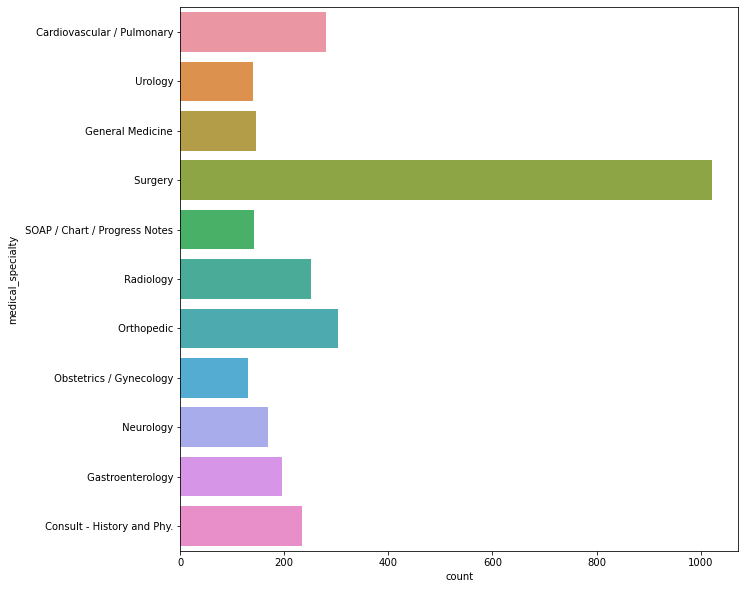

In [76]:
plt.figure(figsize=(10,10))
sns.countplot(y='medical_specialty', data = filtered_data_categories )
plt.show()

In [77]:
data = filtered_data_categories[['transcription', 'medical_specialty']]
data = data.drop(data[data['transcription'].isna()].index)
data.shape

(3010, 2)

In [78]:
data

,transcription,medical_specialty
3,"2-d m-mode : , ,1 . left atrial enlargement le...",Cardiovascular / Pulmonary
4,1 . The left ventricular cavity size wall thic...,Cardiovascular / Pulmonary
7,"2-d echocardiogram , multiple view heart great...",Cardiovascular / Pulmonary
9,"description : ,1 . normal cardiac chamber size...",Cardiovascular / Pulmonary
11,"2-d study,1 . mild aortic stenosis , widely ca...",Cardiovascular / Pulmonary
...,...,...
4967,"exam : , left heart cath , selective coronary ...",Cardiovascular / Pulmonary
4968,"indication : , acute coronary syndrome . , con...",Cardiovascular / Pulmonary
4971,"angina , chest pain due lack oxygen heart ofte...",Cardiovascular / Pulmonary
4972,"indication : , chest pain . , type of test : ,...",Cardiovascular / Pulmonary


In [79]:
X

,m,description,medical_specialty,sample_name,transcription,keywords,medical_specialty_code
0,0,A 23-year-old white female present complaint a...,Allergy / Immunology,allergic rhinitis,"subjective : , This 23-year-old white female p...","allergy / immunology , allergic rhinitis , all...",0
1,1,consult laparoscopic gastric bypass .,Bariatrics,laparoscopic gastric bypass consult - 2,"past medical history : , He difficulty climb s...","bariatrics , laparoscopic gastric bypass , wei...",1
2,2,consult laparoscopic gastric bypass .,Bariatrics,laparoscopic gastric bypass consult - 1,"history of present illness : , I see abc today...","bariatrics , laparoscopic gastric bypass , hea...",1
3,3,2-d m-mode . doppler .,Cardiovascular / Pulmonary,2-d echocardiogram - 1,"2-d m-mode : , ,1 . left atrial enlargement le...","cardiovascular / pulmonary , 2-d m-mode , dopp...",2
4,4,2-d echocardiogram,Cardiovascular / Pulmonary,2-d echocardiogram - 2,1 . The left ventricular cavity size wall thic...,"cardiovascular / pulmonary , 2-d , doppler , e...",2
...,...,...,...,...,...,...,...
4984,4984,patient suffer morbid obesity many year make m...,Bariatrics,discharge summary - gastric bypass,"admission diagnosis : , morbid obesity . bmi 5...","bariatrics , laparoscopic gastric bypass , gas...",1
4985,4985,patient present bariatric surgery service cons...,Bariatrics,bariatric consult - surgical weight loss - 4,"history of present illness : , ms. a 55-year-o...","bariatrics , jenny craig , medifast , nutrisys...",1
4989,4989,evaluation elective surgical weight loss via l...,Bariatrics,bariatric consult - surgical weight loss - 2,"past medical history : , She negative stress t...","bariatrics , elective surgical weight loss , s...",1
4993,4993,"chronic glossitis , xerostomia , probable envi...",Allergy / Immunology,evaluation allergies,"history : , A 55-year-old female present self-...","allergy / immunology , chronic glossitis , xer...",0


In [80]:
#X['TreeToken_cleaned_txt'][0]

In [81]:
#X['Regtoken_cleaned_txt'][0]

In [82]:
X

,m,description,medical_specialty,sample_name,transcription,keywords,medical_specialty_code
0,0,A 23-year-old white female present complaint a...,Allergy / Immunology,allergic rhinitis,"subjective : , This 23-year-old white female p...","allergy / immunology , allergic rhinitis , all...",0
1,1,consult laparoscopic gastric bypass .,Bariatrics,laparoscopic gastric bypass consult - 2,"past medical history : , He difficulty climb s...","bariatrics , laparoscopic gastric bypass , wei...",1
2,2,consult laparoscopic gastric bypass .,Bariatrics,laparoscopic gastric bypass consult - 1,"history of present illness : , I see abc today...","bariatrics , laparoscopic gastric bypass , hea...",1
3,3,2-d m-mode . doppler .,Cardiovascular / Pulmonary,2-d echocardiogram - 1,"2-d m-mode : , ,1 . left atrial enlargement le...","cardiovascular / pulmonary , 2-d m-mode , dopp...",2
4,4,2-d echocardiogram,Cardiovascular / Pulmonary,2-d echocardiogram - 2,1 . The left ventricular cavity size wall thic...,"cardiovascular / pulmonary , 2-d , doppler , e...",2
...,...,...,...,...,...,...,...
4984,4984,patient suffer morbid obesity many year make m...,Bariatrics,discharge summary - gastric bypass,"admission diagnosis : , morbid obesity . bmi 5...","bariatrics , laparoscopic gastric bypass , gas...",1
4985,4985,patient present bariatric surgery service cons...,Bariatrics,bariatric consult - surgical weight loss - 4,"history of present illness : , ms. a 55-year-o...","bariatrics , jenny craig , medifast , nutrisys...",1
4989,4989,evaluation elective surgical weight loss via l...,Bariatrics,bariatric consult - surgical weight loss - 2,"past medical history : , She negative stress t...","bariatrics , elective surgical weight loss , s...",1
4993,4993,"chronic glossitis , xerostomia , probable envi...",Allergy / Immunology,evaluation allergies,"history : , A 55-year-old female present self-...","allergy / immunology , chronic glossitis , xer...",0


In [83]:
#fdist_top10=fdist.most_common(10)
#fdist_top10

In [84]:
X

,m,description,medical_specialty,sample_name,transcription,keywords,medical_specialty_code
0,0,A 23-year-old white female present complaint a...,Allergy / Immunology,allergic rhinitis,"subjective : , This 23-year-old white female p...","allergy / immunology , allergic rhinitis , all...",0
1,1,consult laparoscopic gastric bypass .,Bariatrics,laparoscopic gastric bypass consult - 2,"past medical history : , He difficulty climb s...","bariatrics , laparoscopic gastric bypass , wei...",1
2,2,consult laparoscopic gastric bypass .,Bariatrics,laparoscopic gastric bypass consult - 1,"history of present illness : , I see abc today...","bariatrics , laparoscopic gastric bypass , hea...",1
3,3,2-d m-mode . doppler .,Cardiovascular / Pulmonary,2-d echocardiogram - 1,"2-d m-mode : , ,1 . left atrial enlargement le...","cardiovascular / pulmonary , 2-d m-mode , dopp...",2
4,4,2-d echocardiogram,Cardiovascular / Pulmonary,2-d echocardiogram - 2,1 . The left ventricular cavity size wall thic...,"cardiovascular / pulmonary , 2-d , doppler , e...",2
...,...,...,...,...,...,...,...
4984,4984,patient suffer morbid obesity many year make m...,Bariatrics,discharge summary - gastric bypass,"admission diagnosis : , morbid obesity . bmi 5...","bariatrics , laparoscopic gastric bypass , gas...",1
4985,4985,patient present bariatric surgery service cons...,Bariatrics,bariatric consult - surgical weight loss - 4,"history of present illness : , ms. a 55-year-o...","bariatrics , jenny craig , medifast , nutrisys...",1
4989,4989,evaluation elective surgical weight loss via l...,Bariatrics,bariatric consult - surgical weight loss - 2,"past medical history : , She negative stress t...","bariatrics , elective surgical weight loss , s...",1
4993,4993,"chronic glossitis , xerostomia , probable envi...",Allergy / Immunology,evaluation allergies,"history : , A 55-year-old female present self-...","allergy / immunology , chronic glossitis , xer...",0


In [85]:
data

,transcription,medical_specialty
3,"2-d m-mode : , ,1 . left atrial enlargement le...",Cardiovascular / Pulmonary
4,1 . The left ventricular cavity size wall thic...,Cardiovascular / Pulmonary
7,"2-d echocardiogram , multiple view heart great...",Cardiovascular / Pulmonary
9,"description : ,1 . normal cardiac chamber size...",Cardiovascular / Pulmonary
11,"2-d study,1 . mild aortic stenosis , widely ca...",Cardiovascular / Pulmonary
...,...,...
4967,"exam : , left heart cath , selective coronary ...",Cardiovascular / Pulmonary
4968,"indication : , acute coronary syndrome . , con...",Cardiovascular / Pulmonary
4971,"angina , chest pain due lack oxygen heart ofte...",Cardiovascular / Pulmonary
4972,"indication : , chest pain . , type of test : ,...",Cardiovascular / Pulmonary


In [87]:
#X[0]

In [88]:
#RegexTokenizer + Stopword removal
#Tokenizing as well as removing the stop words from each line.


In [89]:
X

,m,description,medical_specialty,sample_name,transcription,keywords,medical_specialty_code
0,0,A 23-year-old white female present complaint a...,Allergy / Immunology,allergic rhinitis,"subjective : , This 23-year-old white female p...","allergy / immunology , allergic rhinitis , all...",0
1,1,consult laparoscopic gastric bypass .,Bariatrics,laparoscopic gastric bypass consult - 2,"past medical history : , He difficulty climb s...","bariatrics , laparoscopic gastric bypass , wei...",1
2,2,consult laparoscopic gastric bypass .,Bariatrics,laparoscopic gastric bypass consult - 1,"history of present illness : , I see abc today...","bariatrics , laparoscopic gastric bypass , hea...",1
3,3,2-d m-mode . doppler .,Cardiovascular / Pulmonary,2-d echocardiogram - 1,"2-d m-mode : , ,1 . left atrial enlargement le...","cardiovascular / pulmonary , 2-d m-mode , dopp...",2
4,4,2-d echocardiogram,Cardiovascular / Pulmonary,2-d echocardiogram - 2,1 . The left ventricular cavity size wall thic...,"cardiovascular / pulmonary , 2-d , doppler , e...",2
...,...,...,...,...,...,...,...
4984,4984,patient suffer morbid obesity many year make m...,Bariatrics,discharge summary - gastric bypass,"admission diagnosis : , morbid obesity . bmi 5...","bariatrics , laparoscopic gastric bypass , gas...",1
4985,4985,patient present bariatric surgery service cons...,Bariatrics,bariatric consult - surgical weight loss - 4,"history of present illness : , ms. a 55-year-o...","bariatrics , jenny craig , medifast , nutrisys...",1
4989,4989,evaluation elective surgical weight loss via l...,Bariatrics,bariatric consult - surgical weight loss - 2,"past medical history : , She negative stress t...","bariatrics , elective surgical weight loss , s...",1
4993,4993,"chronic glossitis , xerostomia , probable envi...",Allergy / Immunology,evaluation allergies,"history : , A 55-year-old female present self-...","allergy / immunology , chronic glossitis , xer...",0


In [90]:
def cleantext(retext):
    return re.sub('[^a-zA-Z]',' ',str(retext))#.lower()
X['Wordtoken_cleaned_txt']=X['description'].apply(cleantext)
X['description']=X['description'].apply(cleantext)
X['sample_name']=X['sample_name'].apply(cleantext)
X['transcription']=X['transcription'].apply(cleantext)
X['keywords']=X['keywords'].apply(cleantext)


In [91]:
data['transcription']=data['transcription'].apply(cleantext)

In [92]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
data["medical_specialty_code"] = lb_make.fit_transform(data["medical_specialty"])
#data.drop('medical_specialty_code')

In [93]:
X['description'][3]

'  d m mode   doppler  '

In [94]:
X['sample_name'][3]

'  d echocardiogram    '

In [95]:
X['transcription'][3]

'  d m mode          left atrial enlargement leave atrial diameter     cm      normal size right leave ventricle      normal lv systolic function leave ventricular ejection fraction            normal lv diastolic function      No pericardial effusion      normal morphology aortic valve   mitral valve   tricuspid valve   pulmonary valve      pa systolic pressure    mmhg     doppler          mild mitral tricuspid regurgitation      trace aortic pulmonary regurgitation  '

In [96]:
#X[0][3]

In [97]:
X

,m,description,medical_specialty,sample_name,transcription,keywords,medical_specialty_code,Wordtoken_cleaned_txt
0,0,A year old white female present complaint a...,Allergy / Immunology,allergic rhinitis,subjective This year old white female p...,allergy immunology allergic rhinitis all...,0,A year old white female present complaint a...
1,1,consult laparoscopic gastric bypass,Bariatrics,laparoscopic gastric bypass consult,past medical history He difficulty climb s...,bariatrics laparoscopic gastric bypass wei...,1,consult laparoscopic gastric bypass
2,2,consult laparoscopic gastric bypass,Bariatrics,laparoscopic gastric bypass consult,history of present illness I see abc today...,bariatrics laparoscopic gastric bypass hea...,1,consult laparoscopic gastric bypass
3,3,d m mode doppler,Cardiovascular / Pulmonary,d echocardiogram,d m mode left atrial enlargement le...,cardiovascular pulmonary d m mode dopp...,2,d m mode doppler
4,4,d echocardiogram,Cardiovascular / Pulmonary,d echocardiogram,The left ventricular cavity size wall thic...,cardiovascular pulmonary d doppler e...,2,d echocardiogram
...,...,...,...,...,...,...,...,...
4984,4984,patient suffer morbid obesity many year make m...,Bariatrics,discharge summary gastric bypass,admission diagnosis morbid obesity bmi ...,bariatrics laparoscopic gastric bypass gas...,1,patient suffer morbid obesity many year make m...
4985,4985,patient present bariatric surgery service cons...,Bariatrics,bariatric consult surgical weight loss,history of present illness ms a year o...,bariatrics jenny craig medifast nutrisys...,1,patient present bariatric surgery service cons...
4989,4989,evaluation elective surgical weight loss via l...,Bariatrics,bariatric consult surgical weight loss,past medical history She negative stress t...,bariatrics elective surgical weight loss s...,1,evaluation elective surgical weight loss via l...
4993,4993,chronic glossitis xerostomia probable envi...,Allergy / Immunology,evaluation allergies,history A year old female present self ...,allergy immunology chronic glossitis xer...,0,chronic glossitis xerostomia probable envi...


In [98]:
#def lowertxt(review_txt):
#    return str(review_txt).lower()
#X['cleanedtxt']=X["cleanedtxt"].apply(lowertxt)
#X['Tree_cleanedtxt']=X['Tree_cleanedtxt'].apply(lowertxt)
#X['Regex_cleanedtxt']=X['Regex_cleanedtxt'].apply(lowertxt)
#X['Word_cleanedtxt']=X['Word_cleanedtxt'].apply(lowertxt)
#X_test['cleanedtxt']=X_test["cleanedtxt"].apply(lowertxt)

In [99]:
X

,m,description,medical_specialty,sample_name,transcription,keywords,medical_specialty_code,Wordtoken_cleaned_txt
0,0,A year old white female present complaint a...,Allergy / Immunology,allergic rhinitis,subjective This year old white female p...,allergy immunology allergic rhinitis all...,0,A year old white female present complaint a...
1,1,consult laparoscopic gastric bypass,Bariatrics,laparoscopic gastric bypass consult,past medical history He difficulty climb s...,bariatrics laparoscopic gastric bypass wei...,1,consult laparoscopic gastric bypass
2,2,consult laparoscopic gastric bypass,Bariatrics,laparoscopic gastric bypass consult,history of present illness I see abc today...,bariatrics laparoscopic gastric bypass hea...,1,consult laparoscopic gastric bypass
3,3,d m mode doppler,Cardiovascular / Pulmonary,d echocardiogram,d m mode left atrial enlargement le...,cardiovascular pulmonary d m mode dopp...,2,d m mode doppler
4,4,d echocardiogram,Cardiovascular / Pulmonary,d echocardiogram,The left ventricular cavity size wall thic...,cardiovascular pulmonary d doppler e...,2,d echocardiogram
...,...,...,...,...,...,...,...,...
4984,4984,patient suffer morbid obesity many year make m...,Bariatrics,discharge summary gastric bypass,admission diagnosis morbid obesity bmi ...,bariatrics laparoscopic gastric bypass gas...,1,patient suffer morbid obesity many year make m...
4985,4985,patient present bariatric surgery service cons...,Bariatrics,bariatric consult surgical weight loss,history of present illness ms a year o...,bariatrics jenny craig medifast nutrisys...,1,patient present bariatric surgery service cons...
4989,4989,evaluation elective surgical weight loss via l...,Bariatrics,bariatric consult surgical weight loss,past medical history She negative stress t...,bariatrics elective surgical weight loss s...,1,evaluation elective surgical weight loss via l...
4993,4993,chronic glossitis xerostomia probable envi...,Allergy / Immunology,evaluation allergies,history A year old female present self ...,allergy immunology chronic glossitis xer...,0,chronic glossitis xerostomia probable envi...


In [100]:
def removehyphen(text):
    text = re.sub('[0-9]+.\t','',str(text))
    # removing new line characters
    text = re.sub('\n ','',str(text))
    text = re.sub('\n',' ',str(text))
    # removing apostrophes
    text = re.sub("'s",'',str(text))
    # removing hyphens
    text = re.sub("-",' ',str(text))
    text = re.sub("— ",'',str(text))
    # removing quotation marks
    text = re.sub('\"','',str(text))
    # removing salutatio
    # removing any reference to outside text
    text = re.sub("[\(\[].*?[\)\]]", "", str(text))
    return text
                 
#X['cleanedtxt']=X['cleanedtxt'].apply(removehyphen)
X['Wordtoken_cleaned_txt']=X['description'].apply(removehyphen)
X['description']=X['description'].apply(removehyphen)
X['sample_name']=X['sample_name'].apply(removehyphen)
X['transcription']=X['transcription'].apply(removehyphen)
X['keywords']=X['keywords'].apply(removehyphen)

#X['TreeToken_cleaned_txt']=X['TreeToken_cleaned_txt'].apply(removehyphen)
#X['Regtoken_cleaned_txt']=X['Regtoken_cleaned_txt'].apply(removehyphen)
#X['Wordtoken_cleaned_txt']=X['Wordtoken_cleaned_txt'].apply(removehyphen)

In [101]:
data.drop(['medical_specialty'], axis=1)
data['transcription']=X['transcription'].apply(removehyphen)

In [102]:
data.drop(['medical_specialty'], axis=1)

,transcription,medical_specialty_code
3,d m mode left atrial enlargement le...,0
4,The left ventricular cavity size wall thic...,0
7,d echocardiogram multiple view heart great...,0
9,description normal cardiac chamber size...,0
11,d study mild aortic stenosis widely ca...,0
...,...,...
4967,exam left heart cath selective coronary ...,0
4968,indication acute coronary syndrome con...,0
4971,angina chest pain due lack oxygen heart ofte...,0
4972,indication chest pain type of test ...,0


In [103]:
target=data['medical_specialty_code']

In [104]:
target

3       0
4       0
7       0
9       0
11      0
       ..
4967    0
4968    0
4971    0
4972    0
4975    0
Name: medical_specialty_code, Length: 3010, dtype: int32

In [105]:
data=data.drop(['medical_specialty', 'medical_specialty_code'],axis=1)

In [106]:
data

,transcription
3,d m mode left atrial enlargement le...
4,The left ventricular cavity size wall thic...
7,d echocardiogram multiple view heart great...
9,description normal cardiac chamber size...
11,d study mild aortic stenosis widely ca...
...,...
4967,exam left heart cath selective coronary ...
4968,indication acute coronary syndrome con...
4971,angina chest pain due lack oxygen heart ofte...
4972,indication chest pain type of test ...


In [107]:
import numpy as np
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.model_selection import train_test_split

#train= X[:3000]
#test= X[3000:] 
#y_train=train['medical_specialty_code']
#y_test=test['medical_specialty_code']
#X.drop(['medical_specialty_code','m'], axis=1)
#X_train=train
#X_test=test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)
#X_train2, X_test2, y_train2, y_test2 = train_test_split(X['Regtoken_cleaned_txt'], target, test_size=0.33)
#X_train3, X_test3, y_train3, y_test3 = train_test_split(X['Wordtoken_cleaned_txt'], target, test_size=0.33)
print(" The sizes of: X_Train={0}\nX_Test={1}\ny_train={2}\ny_test={3}".format(X_train.size,X_test.size,y_train.size,y_test.size))


 The sizes of: X_Train=2107
X_Test=903
y_train=2107
y_test=903


In [108]:
type(X_train)

pandas.core.frame.DataFrame

##Tokenization


In [109]:
'''
X_train=X_train.to_frame()
y_train=y_train.to_frame()
X_test=X_test.to_frame()
y_test=y_test.to_frame()
'''

'\nX_train=X_train.to_frame()\ny_train=y_train.to_frame()\nX_test=X_test.to_frame()\ny_test=y_test.to_frame()\n'

In [110]:
'''
X_train2=X_train2.to_frame()
y_train2=y_train2.to_frame()
X_test2=X_test2.to_frame()
y_test2=y_test2.to_frame()
'''

'\nX_train2=X_train2.to_frame()\ny_train2=y_train2.to_frame()\nX_test2=X_test2.to_frame()\ny_test2=y_test2.to_frame()\n'

In [111]:
'''
X_train3=X_train3.to_frame()
y_train3=y_train3.to_frame()
X_test3=X_test3.to_frame()
y_test3=y_test3.to_frame()
'''

'\nX_train3=X_train3.to_frame()\ny_train3=y_train3.to_frame()\nX_test3=X_test3.to_frame()\ny_test3=y_test3.to_frame()\n'

In [112]:
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
#count_vect2=CountVectorizer()
#count_vect3=CountVectorizer()

counts=count_vect.fit_transform(X_train['transcription'])
#counts2=count_vect2.fit_transform(X_train2['Regtoken_cleaned_txt'])
#counts3=count_vect3.fit_transform(X_train3['Wordtoken_cleaned_txt'])
#counts=counts.transform(X_train["cleanedtxt"])
print(counts)

  (0, 10155)	1
  (0, 3463)	2
  (0, 30)	2
  (0, 13941)	13
  (0, 1414)	4
  (0, 4857)	2
  (0, 10032)	1
  (0, 8965)	1
  (0, 9535)	1
  (0, 7176)	3
  (0, 933)	1
  (0, 13969)	5
  (0, 6132)	3
  (0, 530)	3
  (0, 5317)	2
  (0, 4251)	2
  (0, 3394)	1
  (0, 8893)	1
  (0, 10261)	3
  (0, 303)	2
  (0, 216)	3
  (0, 9431)	2
  (0, 9804)	3
  (0, 3764)	1
  (0, 7433)	1
  :	:
  (2106, 10724)	1
  (2106, 10843)	1
  (2106, 11091)	1
  (2106, 2760)	1
  (2106, 10521)	3
  (2106, 8942)	1
  (2106, 10880)	1
  (2106, 11883)	1
  (2106, 9123)	2
  (2106, 7512)	1
  (2106, 11698)	1
  (2106, 12761)	1
  (2106, 12065)	1
  (2106, 3688)	1
  (2106, 10472)	1
  (2106, 8691)	1
  (2106, 8930)	1
  (2106, 8756)	1
  (2106, 11103)	1
  (2106, 2967)	1
  (2106, 2652)	1
  (2106, 12911)	1
  (2106, 13916)	1
  (2106, 6257)	1
  (2106, 11230)	1


In [113]:
counts_test=count_vect.transform(X_test['transcription'])
#counts_test2=count_vect2.transform(X_test2["Regtoken_cleaned_txt"])
#counts_test3=count_vect3.transform(X_test3["Wordtoken_cleaned_txt"])

In [114]:
type(X_train)

pandas.core.frame.DataFrame

In [115]:
X_train

,transcription
2504,preoperative diagnoses abnormal uterine bl...
1022,clear corneal temporal incision no stitches ...
2970,cc episodic confusion hx This y...
91,procedure performed bassini inguinal herni...
153,procedure circumcision signed informed...
...,...
715,preoperative dx menorrhagia desires...
710,preoperative diagnoses right buccal space ...
3507,preoperative diagnosis appendicitis po...
1675,findings There lobulated mass lesion epigl...


In [116]:
print(X_train)

                                          transcription
2504  preoperative diagnoses     abnormal uterine bl...
1022  clear corneal temporal incision   no stitches ...
2970  cc     episodic confusion     hx     This    y...
91    procedure performed     bassini inguinal herni...
153   procedure     circumcision     signed informed...
...                                                 ...
715   preoperative dx        menorrhagia     desires...
710   preoperative diagnoses     right buccal space ...
3507  preoperative diagnosis     appendicitis     po...
1675  findings     There lobulated mass lesion epigl...
4392  subjective     mom bring patient today possibl...

[2107 rows x 1 columns]


In [117]:
counts_test.shape

(903, 14594)

In [118]:
counts.shape

(2107, 14594)

In [119]:
print(counts)

  (0, 10155)	1
  (0, 3463)	2
  (0, 30)	2
  (0, 13941)	13
  (0, 1414)	4
  (0, 4857)	2
  (0, 10032)	1
  (0, 8965)	1
  (0, 9535)	1
  (0, 7176)	3
  (0, 933)	1
  (0, 13969)	5
  (0, 6132)	3
  (0, 530)	3
  (0, 5317)	2
  (0, 4251)	2
  (0, 3394)	1
  (0, 8893)	1
  (0, 10261)	3
  (0, 303)	2
  (0, 216)	3
  (0, 9431)	2
  (0, 9804)	3
  (0, 3764)	1
  (0, 7433)	1
  :	:
  (2106, 10724)	1
  (2106, 10843)	1
  (2106, 11091)	1
  (2106, 2760)	1
  (2106, 10521)	3
  (2106, 8942)	1
  (2106, 10880)	1
  (2106, 11883)	1
  (2106, 9123)	2
  (2106, 7512)	1
  (2106, 11698)	1
  (2106, 12761)	1
  (2106, 12065)	1
  (2106, 3688)	1
  (2106, 10472)	1
  (2106, 8691)	1
  (2106, 8930)	1
  (2106, 8756)	1
  (2106, 11103)	1
  (2106, 2967)	1
  (2106, 2652)	1
  (2106, 12911)	1
  (2106, 13916)	1
  (2106, 6257)	1
  (2106, 11230)	1


In [160]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

nb.fit(counts, y_train)

nb2=MultinomialNB()
#nb2.fit(counts2, y_train2)

nb3=MultinomialNB()
#nb3.fit(counts3, y_train3)

In [161]:
len(y_test)

903

In [162]:
counts_test.shape

(903, 14594)

In [163]:
print("-----------"*10)
print("For Multinomial Naive Bayers Classifier for Continuous Bag of Words (CBOW)")
print("Accuracy for NB using TreeTokenizer after applying CountVector:", nb.score(counts_test, y_test))
print("F1-score for NB using TreeTokenizer after applying CountVector:",f1_score(y_test,y_pred, average="macro" ))
#print("Accuracy for NB using RegEx Tokenizer:", nb2.score(counts_test2, y_test2))
#print("Accuracy for NB using Word Tokenizer:", nb3.score(counts_test3, y_test3))

--------------------------------------------------------------------------------------------------------------
For Multinomial Naive Bayers Classifier for Continuous Bag of Words (CBOW)
Accuracy for NB using TreeTokenizer after applying CountVector: 0.416389811738649
F1-score for NB using TreeTokenizer after applying CountVector: 0.12982946038093335


In [164]:
y_pred=nb.predict(counts_test)
from sklearn.metrics import confusion_matrix,f1_score,recall_score,accuracy_score,classification_report
confusion_matrix(y_test, y_pred)

#y_pred2=nb2.predict(counts_test2)
#y_pred3=nb3.predict(counts_test3)

array([[ 35,   3,   0,   3,   0,   0,   0,  14,   7,  23,   0],
       [  1,  45,   1,  13,   5,   1,   3,   0,   0,   0,   0],
       [  0,   6,  29,   1,   0,   0,   0,   8,   1,  18,   0],
       [  0,  37,   0,   7,   0,   0,   0,   0,  10,   2,   0],
       [  1,  10,   0,   0,  12,   0,   2,   8,   3,   9,   0],
       [  0,   1,   0,   0,   0,  23,   0,   4,   0,  10,   1],
       [  0,   9,   0,   0,   3,   0,  55,   7,   1,   7,   0],
       [ 21,   0,   0,   0,  17,   1,   6,  21,   0,   3,   1],
       [  1,  13,   0,  10,   2,   0,   2,   0,   5,   0,   4],
       [ 26,   0,  37,   0,   0,  25,  66,   0,   1, 127,  28],
       [  0,   9,   0,   0,   0,   0,   0,   2,   2,  17,  17]],
      dtype=int64)

In [165]:
f1_score(y_test,y_pred, average="macro" )

0.3693964741927002

In [166]:
print("Classification report for Naive Bayers Classifier \n",classification_report(y_test,y_pred))
print("--------"*10)
#print("Classification report for Naive Bayers Classifier using RegexTokenizer\n",classification_report(y_test2,y_pred2))
print("--------"*10)
#print("Classification report for Naive Bayers Classifier using Treetokenizer\n",classification_report(y_test3,y_pred3))

Classification report for Naive Bayers Classifier 
               precision    recall  f1-score   support

           0       0.41      0.41      0.41        85
           1       0.34      0.65      0.45        69
           2       0.43      0.46      0.45        63
           3       0.21      0.12      0.16        56
           4       0.31      0.27      0.29        45
           5       0.46      0.59      0.52        39
           6       0.41      0.67      0.51        82
           7       0.33      0.30      0.31        70
           8       0.17      0.14      0.15        37
           9       0.59      0.41      0.48       310
          10       0.33      0.36      0.35        47

    accuracy                           0.42       903
   macro avg       0.36      0.40      0.37       903
weighted avg       0.43      0.42      0.41       903

--------------------------------------------------------------------------------
------------------------------------------------------

In [127]:
#print(nb.predict(count_vect.transform(["It's unless excellent"])))

In [167]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, bootstrap=True, max_features='sqrt')
clf.fit(counts, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=10)

In [168]:
y_pred=clf.predict(counts_test)

In [169]:
print("-----------"*10)
print("For Random Forest Classifier for Continuous Bag of Words (CBOW)")
print("The accuracy for RandomForest Classifier is :", accuracy_score(y_test, y_pred))
print("The F1-Score for RandomForest Classifier is :", f1_score(y_test,y_pred, average="macro" ))


--------------------------------------------------------------------------------------------------------------
For Random Forest Classifier for Continuous Bag of Words (CBOW)
The accuracy for RandomForest Classifier is : 0.22702104097452935
The F1-Score for RandomForest Classifier is : 0.13377215038354368


In [170]:
print("Classification report for Random Forest Classifier \n",classification_report(y_test,y_pred))

Classification report for Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.08      0.06      0.07        85
           1       0.28      0.38      0.32        69
           2       0.07      0.05      0.06        63
           3       0.10      0.05      0.07        56
           4       0.14      0.13      0.14        45
           5       0.03      0.03      0.03        39
           6       0.06      0.06      0.06        82
           7       0.17      0.19      0.18        70
           8       0.12      0.14      0.12        37
           9       0.37      0.44      0.40       310
          10       0.03      0.02      0.02        47

    accuracy                           0.23       903
   macro avg       0.13      0.14      0.13       903
weighted avg       0.20      0.23      0.21       903



In [156]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(counts)
X_train_tfidf.shape

(2107, 14594)

In [157]:
from sklearn.naive_bayes import MultinomialNB
clf1 = MultinomialNB().fit(X_train_tfidf, y_train)

In [158]:
y_pred1 = clf1.predict(counts_test)

In [159]:
from sklearn.metrics import accuracy_score,f1_score,recall_score
accuracy_score(y_test, y_pred1)
print("-----------"*10)
print("For Multinomial Naive Bayers Classifier for TF-iDF")
print("The accuracy for Multinomial Naive Bayers Classifier is :", accuracy_score(y_test, y_pred1))
print("The F1-Score for Multinomial Naive Bayers Classifier is :", f1_score(y_test,y_pred1, average="macro" ))

--------------------------------------------------------------------------------------------------------------
For Multinomial Naive Bayers Classifier for TF-iDF
The accuracy for Multinomial Naive Bayers Classifier is : 0.4053156146179402
The F1-Score for Multinomial Naive Bayers Classifier is : 0.13590847865022818


In [136]:
clf_1_randomforest= RandomForestClassifier(n_estimators=10, bootstrap=True, max_features='sqrt')

In [137]:
clf_1_randomforest.fit(X_train_tfidf, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=10)

In [138]:
y_pred1=clf.predict(counts_test)
accuracy_score(y_test, y_pred1)

0.23034330011074197

In [139]:
print("-----------"*10)
print("For Random Forest Classifier for TF-iDF")
print("The accuracy for RandomForest Classifier is :", accuracy_score(y_test, y_pred1))
print("The F1-Score for RandomForest Classifier is :", f1_score(y_test,y_pred1, average="macro" ))

--------------------------------------------------------------------------------------------------------------
For Random Forest Classifier for TF-iDF
The accuracy for RandomForest Classifier is : 0.23034330011074197
The F1-Score for RandomForest Classifier is : 0.13691910617633668
